In [4]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Layer
import numpy as np


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer




# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\Ramdhan\Desktop\Parent',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\Ramdhan\Desktop\Parent',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
print( int( np.ceil(training_set.samples/ 32) ))

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 1,
                         validation_data = test_set
                                 ,    
                         validation_steps = 5
                                )

classifier.save("model.h5")
print("Saved model to disk")








Found 147 images belonging to 2 classes.
Found 147 images belonging to 2 classes.
5


KeyboardInterrupt: 

In [5]:
# retrieve weights from the second hidden layer
filters, biases = classifier.layers[1].get_weights()

ValueError: not enough values to unpack (expected 2, got 0)

In [3]:
classifier.summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

model = load_model('model.h5')
test_image = image.load_img(r'C:\Users\Ramdhan\Desktop\Multi\Cat\11.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Ram'
    print(prediction)
else:
    prediction = 'Nikita'
    print(prediction)

Nikita


In [13]:
import numpy as np

arr = np.load('conv2d_1_kernel_0.npy')


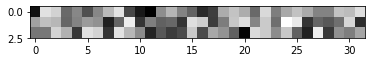

In [25]:
from  matplotlib import pyplot as plt

plt.imshow(arr[2][2],cmap='gray')
plt.show()

In [26]:
#!pip install matplotlib

In [2]:
#!pip install keras==2.3.0

In [3]:
#!pip install pillow==7.0.0

In [4]:
#pip list